In [1]:
#--------------------------must have---------------------------
import numpy as np
import pandas as pd
import random

#----------------------plotting libraries----------------------
import scikitplot as skplt
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 8) #Change matplotlib Box Size
plt.rcParams["font.size"] = 14 #Change matplotlib Font Size

#----------------------sklearn libraries-----------------------
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#---------------------------others------------------------------
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization

In [2]:
Features_test = pd.read_csv('features_test.csv', delimiter=',')
print(Features_test.shape)
Features_test.head()

(20000, 121)


,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,0.242392,0.524801,9.531945,0.551043,0.853324,2.084798,-23.881055,1.752809,4.019658,...,0.996646,0.464636,0.927718,2.136614,-0.625167,11.164489,12.651970,3.191951,0.770754,11.564876
1,1,0.197594,1.029150,13.064256,2.697584,0.032053,0.555707,-47.774112,0.211458,-5.489373,...,16.166253,0.074028,0.114691,0.700676,0.909923,-12.253487,-0.839493,3.405661,0.772885,2.602072
2,2,0.676448,0.250171,10.370677,1.255717,0.028614,1.916394,65.747722,1.791534,-10.868221,...,1.382589,0.527797,0.818678,0.780533,1.833105,9.943211,-11.567759,0.387331,0.345355,0.274009
3,3,1.561018,0.617100,0.379516,1.515827,0.005581,0.002844,-11.036037,0.154748,17.727657,...,3.028235,0.664532,0.124984,0.438145,0.562478,1.999034,-3.481156,0.374161,0.657491,0.944878
4,4,0.403669,6.981975,0.535448,0.654590,0.670791,2.377098,8.185199,0.703429,5.420341,...,2.218101,0.228779,0.156150,1.444829,0.905621,4.061059,3.467491,0.339719,0.411329,0.382129


In [3]:
#X_test = X_test.drop(["Id"], 1)

In [4]:
X = pd.read_csv('features_train.csv', delimiter=',')
print(X.shape)
X.head()


(10000, 121)


,Id,0,1,2,3,4,5,6,7,8,...,110,111,112,113,114,115,116,117,118,119
0,0,2.311705,0.445665,7.020637,1.582505,3.010977,1.375501,29.897623,2.886738,-8.641869,...,0.642797,0.706869,0.997519,1.270321,0.109460,2.829606,-8.292344,1.423754,0.090224,2.006436
1,1,0.580430,0.200428,22.176950,0.479475,0.173418,0.106690,-28.162402,5.388960,-9.188298,...,1.966491,0.330869,0.449754,0.257662,-1.131653,-0.908362,20.468617,1.146844,0.142068,0.373541
2,2,0.042687,0.641976,1.663984,0.998398,1.262488,0.784453,-22.016388,1.512673,-3.526049,...,0.897811,0.610529,0.158270,5.695307,0.358590,-8.164399,0.596139,0.522287,0.832107,4.264087
3,3,0.060388,1.408700,92.827212,2.691115,0.645211,0.710104,12.132919,1.606096,-0.782570,...,1.375550,0.708163,0.537862,1.357389,-1.659754,-1.105801,-6.426477,0.404628,0.452828,1.106436
4,4,1.045148,0.704313,4.823582,0.546102,0.397827,0.606078,-11.135888,0.639788,-9.182691,...,10.556016,0.225400,0.672425,0.257381,-0.435355,7.744958,10.908781,4.413541,0.782079,0.279165


In [5]:
X = X.drop(["Id", "81", "112", "113", "119"], 1)

In [6]:
y = pd.read_csv('target_train.csv', delimiter=',')
print(y.shape)
y.head()


(10000, 2)


,Id,Expected
0,0,0
1,1,0
2,2,2
3,3,1
4,4,2


In [7]:
y = y.drop(["Id"], 1)

In [8]:
print(y.shape)


(10000, 1)


In [9]:
y.shape


(10000, 1)

In [10]:
[X.isna().sum()]

[0      0
 1      0
 2      0
 3      0
 4      0
       ..
 114    0
 115    0
 116    0
 117    0
 118    0
 Length: 116, dtype: int64]

In [11]:
#data = data.drop_duplicates(inplace=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8000 samples.
Testing set has 2000 samples.


In [13]:
#f,ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')
#None

In [15]:
#X1 = X.iloc[:, 1:20]


In [14]:
'''
f,ax = plt.subplots(figsize=(20, 20))
sns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')
None
'''

"\nf,ax = plt.subplots(figsize=(20, 20))\nsns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = 'coolwarm')\nNone\n"

In [20]:
model_accuracy = {}

def model_evaluation(model_name,predictions):
    
    print(classification_report(y_test, predictions))
    print('----------------------------------------------------------')
    print(confusion_matrix(y_test, predictions))
    print('----------------------------------------------------------')
    skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print('----------------------------------------------------------')
    
    model_accuracy[model_name] = accuracy

In [19]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(X_train, y_train.values.ravel())
rfc_predictions = rfc.predict(X_test)

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       665
           1       0.53      0.58      0.55       627
           2       0.54      0.46      0.50       708

    accuracy                           0.53      2000
   macro avg       0.53      0.53      0.53      2000
weighted avg       0.53      0.53      0.53      2000

----------------------------------------------------------
[[367 145 153]
 [135 361 131]
 [204 175 329]]
----------------------------------------------------------
Accuracy: 52.85%
----------------------------------------------------------


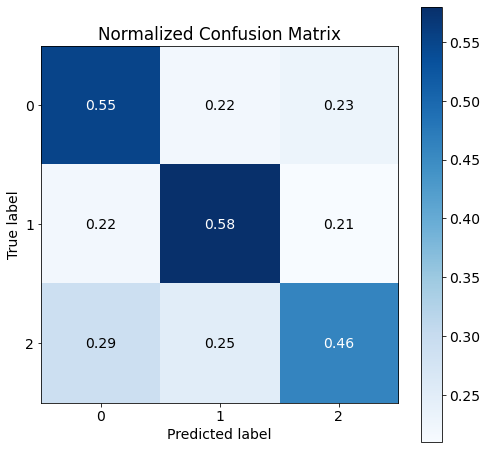

In [21]:
model_evaluation('rfc', rfc_predictions)

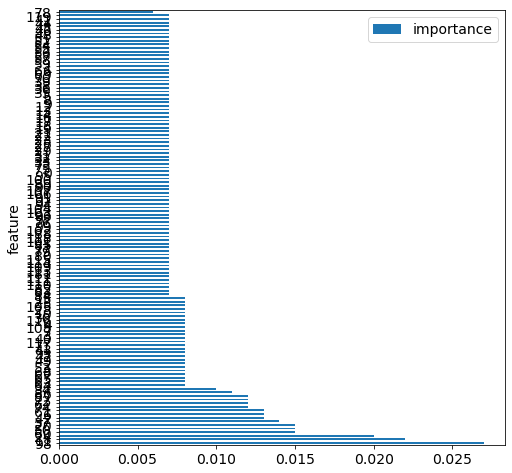

In [28]:
rfc_importances = pd.DataFrame({"feature": X_train.columns, "importance": np.round(rfc.feature_importances_, 3)})
rfc_importances = rfc_importances.sort_values("importance", ascending=False).set_index("feature")
rfc_importances.plot(kind='barh')

In [29]:
rfc_importances

,importance
feature,
98,0.027
11,0.022
24,0.020
60,0.015
50,0.015
...,...
45,0.007
44,0.007
41,0.007


In [32]:
rfc_importances_top20 = rfc_importances.iloc[0:20]

In [ ]:
random_search

In [35]:
rfc_importances_top20

,importance
feature,
98,0.027
11,0.022
24,0.020
60,0.015
50,0.015
20,0.015
37,0.014
42,0.013
6,0.013


In [ ]:
#features index in list
# subselect

In [46]:
top20_features = rfc_importances_top20[0:].values.tolist()

In [88]:
X_top20 = X[rfc_importances_top20.index]


In [15]:
X_top20 = X[["98","11","24","60","50","20","37","42","6","61","74","62","72","87","86","34","64","63","65","67"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_top20, y, test_size=0.2 , random_state=0)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8000 samples.
Testing set has 2000 samples.


In [17]:
#drop = [81, 112, 113, 119]

In [18]:
X_train.shape

(8000, 20)

In [21]:
rfc = RandomForestClassifier()

In [22]:
pipe_rand = Pipeline([ ("clf", rfc)])

In [24]:
from catboost import CatBoostClassifier


rand_params = [
    {
        "clf": [XGBClassifier()],
        #"clf__learning_rate": np.around(np.linspace(0.01, 0.08, 15), decimals=3),
        "clf__n_estimators": [100, 200], #np.linspace(50, 1200).astype(int),
        "clf__max_depth": range(2, 10),
        "clf__min_child_weight": [0, 1],
    },
    {
        "clf": [AdaBoostClassifier()],
        "clf__n_estimators": [100, 200], # np.linspace(25, 600).astype(int),
        "clf__learning_rate": np.around(np.linspace(0.01, 1, 15), decimals=2),
    },
    {
        "clf": [CatBoostClassifier()],
        #"clf__learning_rate": np.around(np.linspace(0.01, 1, 15), decimals=2),
        "clf__depth": range(2, 10),
        "clf__l2_leaf_reg": range(
            1, 9, 2
        ), 
    },
    {
        "clf": [RandomForestClassifier()],
        "clf__n_estimators": [100, 200], #list(range(50, 950, 100)),
        "clf__max_depth": [None, 1, 2, 5, 7, 10, 15, 25, 40],
    },
]

In [ ]:
randsearch_cv = RandomizedSearchCV(
    pipe_rand, rand_params, n_iter=16, cv=4, scoring="f1_macro", n_jobs=-1, verbose=1
)
randsearch_cv.fit(X_train, y_train)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 24.6min


In [64]:
randsearch_cv.best_params_

{'feat_select__k': 50,
 'clf__l2_leaf_reg': 5,
 'clf__depth': 8,
 'clf': <catboost.core.CatBoostClassifier at 0x120fccf70>}

In [65]:
randsearch_cv.best_score_

0.5979108676671562

In [66]:
# importance is the coefficient of the selected features. 
# it indicate how significant the features will are during prediction.
importances = randsearch_cv.best_estimator_.named_steps['clf'].feature_importances_
importances

array([1.05227447, 0.89610194, 1.75486407, 1.03140622, 1.09602501,
       6.48673327, 1.08470906, 0.90804695, 0.92854911, 5.02891688,
       5.67778291, 0.8486508 , 1.16940543, 0.9340322 , 2.02196446,
       1.09226573, 1.06450309, 5.54579927, 0.94432181, 0.91179221,
       1.01712855, 4.78770544, 1.28991892, 1.02804647, 5.3732648 ,
       3.95924984, 2.4248237 , 1.54024946, 1.06171097, 0.98434547,
       4.27049467, 0.76497055, 3.8924099 , 0.90210005, 0.6860754 ,
       1.07706564, 3.92746133, 2.58722184, 0.98422632, 0.92376254,
       7.4028904 , 0.9714982 , 1.0010565 , 0.91207585, 0.96427659,
       0.82126615, 0.9576942 , 0.99442527, 0.80137995, 1.21306012])

In [68]:
# shows all feature status.
# True: indicates that the feature is selected
# False:
selected_features = pd.DataFrame()
selected_features['columns'] = list(X.columns)
selected_features['selected']  = list(randsearch_cv.best_estimator_.named_steps['feat_select'].get_support())
selected_features

,columns,selected
0,0,True
1,1,True
2,2,True
3,3,True
4,4,True
...,...,...
115,115,False
116,116,True
117,117,False
118,118,False


In [70]:
# all features selected for prediction
selected_features = X.columns[randsearch_cv.best_estimator_.named_steps['feat_select'].get_support()]
selected_features

Index(['0', '1', '2', '3', '4', '11', '13', '15', '18', '20', '24', '26', '27',
       '33', '34', '39', '41', '42', '43', '45', '48', '50', '53', '57', '60',
       '61', '62', '63', '65', '70', '72', '73', '74', '77', '79', '83', '86',
       '87', '88', '90', '98', '100', '101', '103', '105', '108', '109', '112',
       '113', '116'],
      dtype='object')

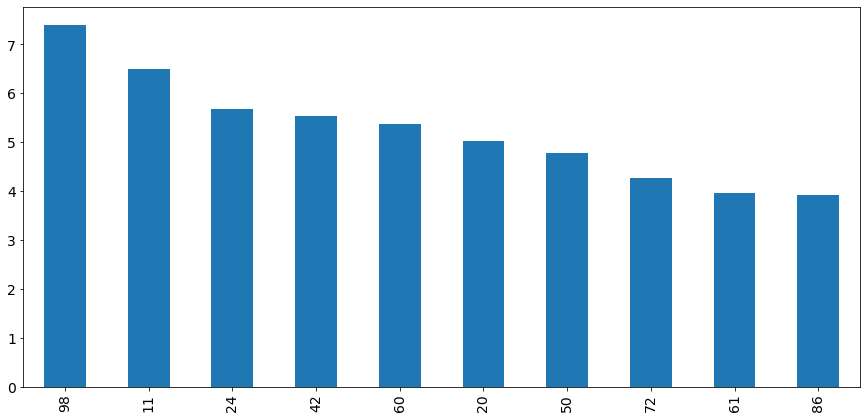

In [71]:
feat_importances = pd.Series(importances, index=selected_features)
feat_importances.nlargest(10).plot(kind='bar', rot=90, figsize=(15,7));

In [79]:
k_option = [40, 50, 60] 

In [80]:
rand_params = [
    {
        "feat_select__k": k_option,
        "clf": [CatBoostClassifier()],
        "clf__depth": [6,8,10],
        "clf__l2_leaf_reg": [3,5,7], 
    },
]

In [81]:
randsearch_cv.best_params_

{'feat_select__k': 50,
 'clf__l2_leaf_reg': 5,
 'clf__depth': 8,
 'clf': <catboost.core.CatBoostClassifier at 0x120fccf70>}